In [1]:
from src.config import BLD
from src.config import SRC
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt

In [101]:
df_h=pd.read_stata("src/original_data/HHENDDAT_cf_W11.dta",convert_categoricals=False)
df_p=pd.read_stata("src/original_data/PENDDAT_cf_W11.dta",convert_categoricals=False)
df_h_c = pd.read_pickle(BLD/"cleaned_data/HHENDDAT_clean.pickle")
df_p_c = pd.read_pickle(BLD/"cleaned_data/PENDDAT_clean.pickle")
df_p_w=pd.read_pickle(BLD/"weighted_data/PENDDAT_weighted.pickle")
df_h_w=pd.read_pickle(BLD/"weighted_data/HHENDDAT_weighted.pickle")


In [102]:
x_p = df_p_w.reset_index().groupby("wave").count().reset_index()["wave"]
y_p = df_p_w.reset_index().groupby("wave").count().reset_index()["p_id"]


In [103]:
x_h = df_h_w.reset_index().groupby("wave").count().reset_index()["wave"]
y_h = df_h_w.reset_index().groupby("wave").count().reset_index()["hh_id"]

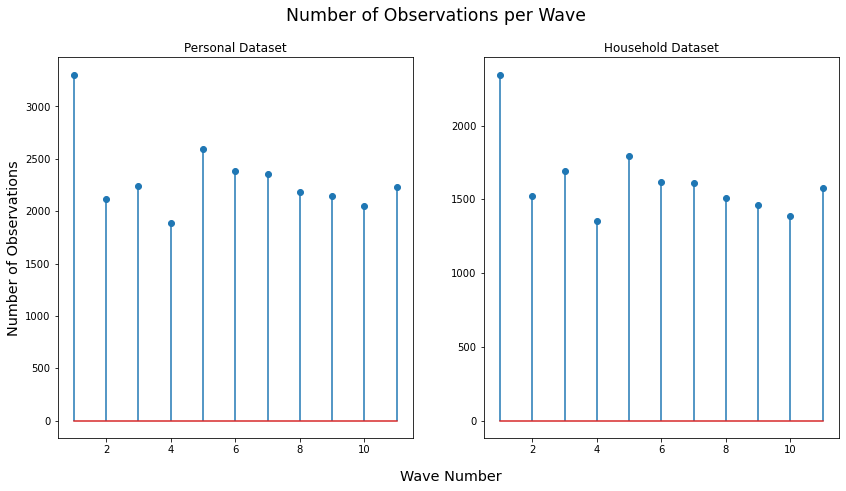

In [46]:
# number of observation per wave
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(14,7))
ax1.stem(x_p,y_p)
ax2.stem(x_h,y_h)
ax1.set_ylabel("Number of Observations",fontsize="x-large")
fig.suptitle("Number of Observations per Wave",fontsize="xx-large")
ax1.set_title("Personal Dataset")
ax2.set_title("Household Dataset")
fig.text(0.465,0.04,"Wave Number",fontsize="x-large")
#plt.xticks(x)
plt.show()

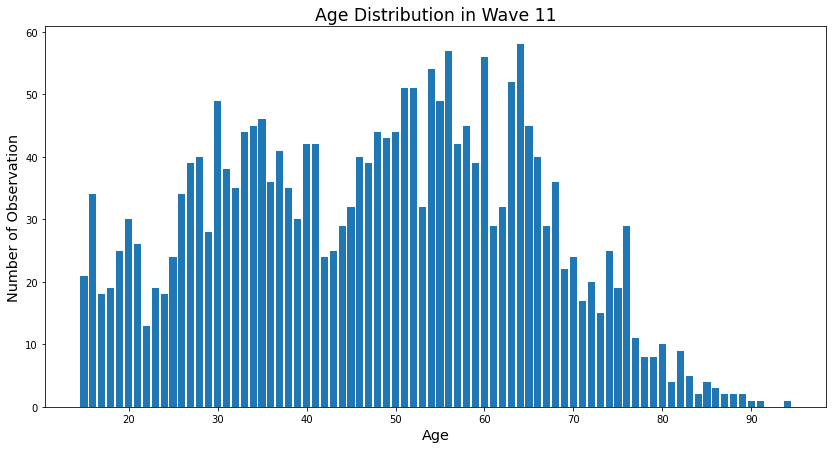

In [66]:
# number of observation per age
x_p=df_p_w.reset_index()
x_p =x_p[x_p["wave"]==11].groupby("age").count()["p_id"].reset_index()["age"]
#x=df_p_w.iloc[df_p_c.index.get_level_values('wave') == 11].groupby("age").count()["p_id"].reset_index()["age"]
y_p=df_p_w.reset_index()
y_p =y_p[y_p["wave"]==11].groupby("age").count()["p_id"].reset_index()["p_id"]
#y=df_p_w.iloc[df_p_c.index.get_level_values('wave') == 11].groupby("age").count()["p_id"].reset_index()["p_id"]

fig, ax = plt.subplots(figsize=(14,7))
ax.bar(x_p,y_p)
ax.set_ylabel("Number of Observation",fontsize="x-large")
ax.set_xlabel("Age",fontsize="x-large")
ax.set_title("Age Distribution in Wave 11",fontsize="xx-large")
#plt.xticks(x)
plt.show()


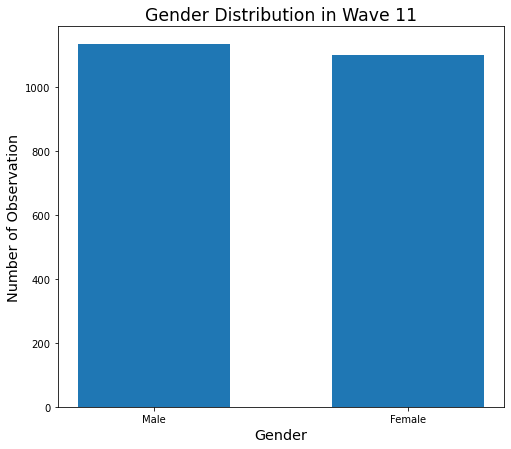

In [84]:
# Gender Distribution
x_p=df_p_w.reset_index()
x_p =x_p[x_p["wave"]==11].groupby("sex").count()["p_id"].reset_index()["sex"]
y_p=df_p_w.reset_index()
y_p =y_p[y_p["wave"]==11].groupby("sex").count()["p_id"].reset_index()["p_id"]

fig, ax = plt.subplots(figsize=(8,7))
ax.bar(x_p,y_p,width=0.6)
plt.xticks([1,2],["Male","Female"])
ax.set_xlabel("Gender",fontsize="x-large")
ax.set_ylabel("Number of Observation",fontsize="x-large")
plt.title("Gender Distribution in Wave 11",fontsize="xx-large")
plt.show()

In [153]:
#genrole_modern, genrole_traditional
x_p=df_p_w.reset_index()
x_p =x_p[x_p["wave"]==11].groupby("sex").mean()[["genrole_modern","genrole_traditional"]].reset_index()
x_1 = x_p["sex"]
y_1 = x_p["genrole_traditional"]
y_2 = x_p["genrole_modern"]


In [147]:
x_p=df_p_w.reset_index()
x_p =x_p[x_p["wave"]==11].groupby("age").mean()[["genrole_modern","genrole_traditional"]].reset_index()
x_2 = x_p["age"]
y_1_sex = x_p["genrole_traditional"]
y_2_sex = x_p["genrole_modern"]

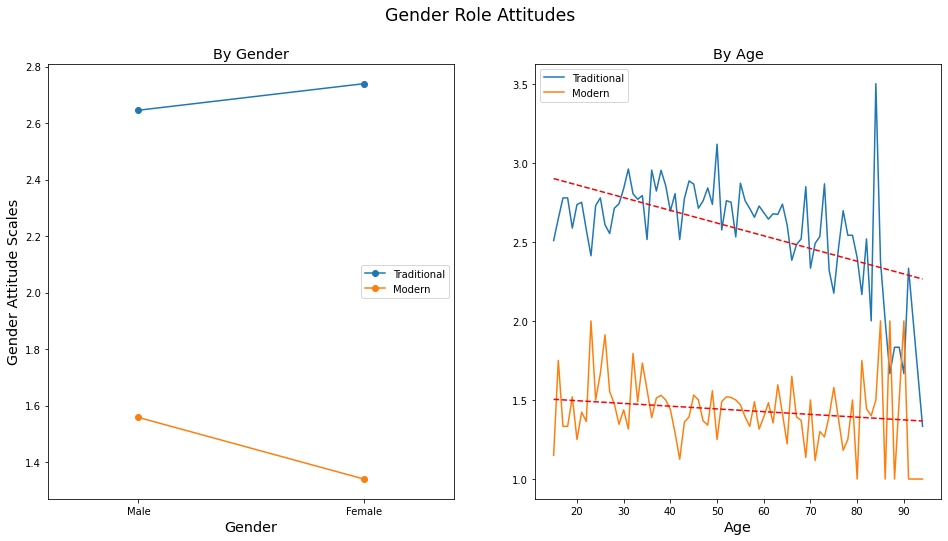

<Figure size 432x288 with 0 Axes>

In [175]:
fig, (ax1,ax2) =plt.subplots(1,2,figsize=(16,8))
ax1.plot(x_1,y_1,'o',ls='-',label="Traditional")
ax1.plot(x_1,y_2,'o',ls='-', label="Modern")
ax1.set_xbound(0.60,2.40)
ax1.legend(loc="center right")
ax1.set_xlabel("Gender",fontsize="x-large")
ax1.set_ylabel("Gender Attitude Scales",fontsize="x-large")
ax1.set_title("By Gender",fontsize="x-large")
ax1.set_xticks([1,2],["Male","Female"])

ax2.plot(x_2,y_1_sex,label="Traditional")
ax2.plot(x_2,y_2_sex, label="Modern")
ax2.legend()
z_1 = np.polyfit(x_2, y_1_sex, 1)
p_1 = np.poly1d(z_1)
ax2.plot(x_2,p_1(x_2),"r--")
z_2 = np.polyfit(x_2, y_2_sex, 1)
p_2 = np.poly1d(z_2)
ax2.plot(x_2,p_2(x_2),"r--")
ax2.set_xlabel("Age",fontsize="x-large")
ax2.set_title("By Age",fontsize="x-large")
fig.suptitle("Gender Role Attitudes",fontsize="xx-large")
plt.show()
plt.savefig(SRC/"deneme.png")

In [6]:
dummy_b=pd.get_dummies(df_h_c['HLS0900b'],prefix="HLS0900b",dummy_na=True)
dummy_b.loc[dummy_b.HLS0900b_nan==1,["HLS0900b_1.0","HLS0900b_2.0"]]=np.nan
dummy_b

HLS0900b_1.0  HLS0900b_2.0  HLS0900b_nan
hh_id       wave                                          
10000019.0  1.0            NaN           NaN             1
            3.0            NaN           NaN             1
10000020.0  1.0            NaN           NaN             1
            2.0            NaN           NaN             1
            3.0            NaN           NaN             1
...                        ...           ...           ...
110002040.0 11.0           NaN           NaN             1
110002041.0 11.0           NaN           NaN             1
110002042.0 11.0           1.0           0.0             0
110002045.0 11.0           NaN           NaN             1
110002057.0 11.0           NaN           NaN             1

[17874 rows x 3 columns]

In [123]:
if df_h_c["HLS0900b"] == 1:
    df_h_c["HLS0900b_d"] = 1
elif (df_h_c["HLS0900b"]==2 | df_h_c["HLS0900a"]==1):
    df_h_c["HLS0900b_d"] = 0
else:
    df_h_c["HLS0900b_d"] =np.nan

In [ ]:
def create_dummies_depr(dummies_h=None):
    df_h = pd.read_pickle(BLD / "HHENDDAT_clean.pickle")
    if dummies_h is None:
        dummies_h = Path(SRC / "data_management/dummies/HHENDDAT_dummies.yaml")
    with open(dummies_h) as stream:
        dummies_h = yaml.safe_load(stream)["deprivation"]
    for dummies in dummies_h:
        df_h[df_h[f"{dummies}_b"] == 1,"HLS0900_dummies"]=1
        df_h[df_h[f"{dummies}_b"] == 2 ,"HLS0900_dummies"]=0
        df_h[df_h[f"{dummies}_a"] == 1 ,"HLS0900_dummies"]=0
    return df_h


In [168]:
df_h_c.loc[df_h_c["HLS0900b"] == 1,"HLS0900b_d"]=1

In [32]:
 # df = pd.concat([df, pd.get_dummies(df['YEAR'])], axis=1)
 # It is better to include inplace=True when writing the function
sex_dummy = pd.get_dummies(df_p_c['sex'],prefix="sex",).rename(columns = {'sex_1.0': 'sex_male', 'sex_2.0': 'sex_female'})
salary_dummy=pd.get_dummies(df_p_c["salary"],prefix="salary",).rename(columns = {'salary_1.0': 'salary_emp', 'salary_2.0': 'salary_nemp'})
df_p_c['doc_dummy']=(df_p_c['PG0100'] > 0).astype(int)
social_media_dummy=pd.get_dummies(df_p_c['PSM0100'],prefix="soc_med").rename(columns = {'soc_med_1.0': 'soc_med_use', 'soc_med_2.0': 'soc_med_no_use'})
close_friend_dummy= pd.get_dummies(df_p_c['PSK0100'],prefix="close_friend").rename(columns = {'close_friend_1.0': 'close_friend', 'close_friend_2.0': 'close_friend_no'})
# HH variables
alg2_dummy=pd.get_dummies(df_h_c['hh_alg2'],prefix="hh_alg2").rename(columns = {'hh_alg2_1.0': 'hh_alg2_receiving', 'hh_alg2_2.0': 'hh_alg2_notreceiving'})
child_benefit_dummy=pd.get_dummies(df_h_c['child_benefit'],prefix="child_benefit").rename(columns = {'child_benefit_1.0': 'child_benefit_receive', 'child_benefit_2.0': 'child_benefit_notreceiving'})

In [63]:
def create_dummies(dummies_p= None, dummies_h=None):
    df_p = pd.read_pickle(BLD/"PENDDAT_clean.pickle")
    df_h = pd.read_pickle(BLD/"HHENDDAT_clean.pickle")
    if dummies_p == None:
        dummies_p=Path(SRC / "data_management/dummies/PENDDAT_dummies.yaml")
    if dummies_h == None:
        dummies_h=Path(SRC / "data_management/dummies/HHENDDAT_dummies.yaml")
    with open(dummies_p, 'r') as stream:
        dummies_p = yaml.safe_load(stream)
    with open(dummies_h, 'r') as stream:
        dummies_h = yaml.safe_load(stream)
    for dummies in dummies_p:
        if dummies == "PG0100":
            df_p[f"{dummies}_d"] = (df_p[f'{dummies}'] > 0).astype(int)    
        else:
            df_p=pd.concat([df_p,pd.get_dummies(df_p[f'{dummies}'],prefix=f"{dummies}").rename(columns = {f'{dummies}_1.0': f'{dummies}_d'}) ], axis=1).drop(f'{dummies}_2.0', axis=1)
    for dummies in dummies_h:
        df_h=pd.concat([df_h,pd.get_dummies(df_h[f'{dummies}'],prefix=f"{dummies}").rename(columns = {f'{dummies}_1.0': f'{dummies}_d'}) ], axis=1).drop(f'{dummies}_2.0', axis=1)
    return (df_p , df_h)

In [67]:
 pd.get_dummies(df_p_c['sex'],prefix="sex",).rename(columns = {'sex_1.0': 'sex_male', 'sex_2.0': 'sex_female'})

sex_male  sex_female
hh_id       wave                      
10000019.0  1.0          0           1
            1.0          1           0
            3.0          0           1
10000020.0  1.0          1           0
            1.0          0           1
...                    ...         ...
110002041.0 11.0         1           0
110002042.0 11.0         1           0
            11.0         1           0
110002045.0 11.0         1           0
110002057.0 11.0         1           0

[25474 rows x 2 columns]

In [117]:
import yaml
with open(SRC/ "final\PENDDAT_stat.yaml", 'r') as stream:
    out = yaml.safe_load(stream)
out

{'sex_dummy': 'Male (=1)',
 'age': 'Age',
 'religiosity': 'Religiosity (1=Not at all to 4=Very)',
 'PA1000': 'General life satisfaction (0=Totally dissatisfied to 10=Completely satisfied)',
 'PSM0100_dummy': 'Used social meadia in the last 4 week (=1)',
 'PSK0200': 'Number of close friends',
 'PG0100': 'Number of doctor visits, last month',
 'net_income': 'Net income, in euros',
 'gross_income': 'Gross income, in euros',
 'job_hours': 'Contractual total working time',
 'emp_dummy': 'Employed (>400/450 euros per month)',
 'unemp_dummy': 'Registered as Unemployed(=1)',
 'migration_dummy': 'No migration background(=1)'}

In [113]:
data=[]
for x,y in out.items():
    data.append(df_p_c.reset_index()[f"{x}"])
df_sum_stat=pd.DataFrame(data)
df_sum_sta=df_sum_stat.rename(index=out).T.describe(percentiles=[.5]).T.rename(columns={"50%":"median"})


In [116]:
df_sum_sta.round(2)

,count,mean,std,min,median,max
Male (=1),25468.0,0.48,0.50,0.0,0.0,1.0
Age,25418.0,45.85,16.46,15.0,46.0,97.0
Religiosity (1=Not at all to 4=Very),13604.0,2.23,0.92,1.0,2.0,4.0
General life satisfaction (0=Totally dissatisfied to 10=Completely satisfied),25418.0,6.75,2.04,0.0,7.0,10.0
Used social meadia in the last 4 week (=1),5795.0,0.48,0.50,0.0,0.0,1.0
Number of close friends,23219.0,8.03,8.43,1.0,6.0,99.0
"Number of doctor visits, last month",25346.0,2.90,5.25,0.0,1.0,99.0
"Net income, in euros",9242.0,1525.34,2052.52,0.0,1300.0,111419.0
"Gross income, in euros",8239.0,2241.70,2032.32,0.0,1870.0,100000.0
Contractual total working time,7495.0,33.88,10.17,0.0,36.0,101.0


In [99]:
from sys import platform
def get_names_dataset(path=SRC / "original_data"):
    if platform == "win32":
        a = r"\*"
        b = "\\"
    elif platform == "darwin":
        a = r"/*"
        b = "/"

    files = list(glob.glob(str(path) + f"{a}"))
    name = []
    for i in range(len(files)):
        if any(x.isupper() for x in files[i].split(f"{b}")[-1].split("_")[0]):
            name.append(files[i].split(f"{b}")[-1].split("_")[0])
        else:
            name.append(
                files[i].split(f"{b}")[-1].split("_")[0]
                + "_"
                + files[i].split(f"{b}")[-1].split("_")[1]
            )
    return name

In [101]:
import glob
from pathlib import Path
from sys import platform
get_names_dataset()

['HHENDDAT', 'PENDDAT']

In [59]:
df_p_c.reset_index().describe().rename(columns=out)

,hh_id,wave,p_id,survey_year,survey_mon,sex,Age,Religiosity (1=Not at all to 4=Very),PA0100,PA0300,...,eri_effort,eri_reward,genrole_traditional,Male (=1),Employed (>400/450 euros per month),PG0100_dummy,Used social meadia in the last 4 week (=1),PSK0100_dummy,Registered as Unemployed(=1),No migration background(=1)
count,2.547400e+04,25474.000000,2.547400e+04,25474.000000,25474.000000,25468.00000,25418.000000,13604.000000,25454.000000,25447.000000,...,4671.000000,4669.000000,12025.000000,25468.00000,18550.000000,25346.000000,5795.000000,25085.000000,18543.000000,24469.000000
mean,2.877334e+07,5.780678,2.877334e+09,2011.771021,4.068972,1.51975,45.852231,2.225375,6.596291,6.547923,...,2.609006,2.706807,2.618753,0.48025,0.458706,0.733291,0.484038,0.931274,0.298549,0.245249
std,2.700189e+07,3.221374,2.700189e+09,3.235028,1.920635,0.49962,16.456494,0.924679,2.408646,2.322850,...,0.812798,0.556200,0.763904,0.49962,0.498305,0.442248,0.499788,0.252993,0.457634,0.430244
min,1.000002e+07,1.000000,1.000002e+09,2006.000000,1.000000,1.00000,15.000000,1.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000487e+07,3.000000,1.000487e+09,2009.000000,3.000000,1.00000,33.000000,1.000000,5.000000,5.000000,...,2.000000,2.428571,2.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,1.000981e+07,6.000000,1.000981e+09,2012.000000,4.000000,2.00000,46.000000,2.000000,7.000000,7.000000,...,2.666667,2.714286,2.666667,0.00000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
75%,5.000085e+07,9.000000,5.000085e+09,2015.000000,5.000000,2.00000,58.000000,3.000000,8.000000,8.000000,...,3.333333,3.000000,3.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,1.100021e+08,11.000000,1.100021e+10,2017.000000,12.000000,2.00000,97.000000,4.000000,10.000000,10.000000,...,4.000000,4.000000,4.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [49]:
sum_stat=df_p_c.reset_index().describe().T.drop(["25%","75%","count"],axis=1)

In [50]:
sum_stat

,mean,std,min,50%,max
hh_id,2.877334e+07,2.700189e+07,1.000002e+07,1.000981e+07,1.100021e+08
wave,5.780678e+00,3.221374e+00,1.000000e+00,6.000000e+00,1.100000e+01
p_id,2.877334e+09,2.700189e+09,1.000002e+09,1.000981e+09,1.100021e+10
survey_year,2.011771e+03,3.235028e+00,2.006000e+03,2.012000e+03,2.017000e+03
survey_mon,4.068972e+00,1.920635e+00,1.000000e+00,4.000000e+00,1.200000e+01
...,...,...,...,...,...
PG0100_dummy,7.332912e-01,4.422476e-01,0.000000e+00,1.000000e+00,1.000000e+00
PSM0100_dummy,4.840380e-01,4.997883e-01,0.000000e+00,0.000000e+00,1.000000e+00
PSK0100_dummy,9.312737e-01,2.529932e-01,0.000000e+00,1.000000e+00,1.000000e+00
unemp_dummy,2.985493e-01,4.576340e-01,0.000000e+00,0.000000e+00,1.000000e+00


In [168]:
merged_data=pd.merge(df_p_c,df_h_c,on=["wave","hh_id","survey_year","survey_mon"],
            how="outer",indicator=True)
merged_data

p_id  survey_year  survey_mon  sex   age  \
wave hh_id                                                           
1.0  10000019.0   1.000002e+09         2007           5  2.0  36.0   
     10000019.0   1.000002e+09         2007           5  1.0  39.0   
3.0  10000019.0   1.000002e+09         2009           3  2.0  38.0   
1.0  10000020.0   1.000002e+09         2007           4  1.0  66.0   
     10000020.0   1.000002e+09         2007           4  2.0  61.0   
...                        ...          ...         ...  ...   ...   
11.0 110001676.0           NaN         2017           6  NaN   NaN   
     110001722.0           NaN         2017           7  NaN   NaN   
     110001759.0           NaN         2017           6  NaN   NaN   
     110001813.0           NaN         2017           6  NaN   NaN   
     110002019.0           NaN         2017           6  NaN   NaN   

                  religiosity  PA0100  PA0300  PA0800  PA0900  ...  \
wave hh_id                                                     ...   
1.0  10000019.0           2.0     8.0    10.0     8.0     6.0  ...   
     10000019.0           2.0     8.0     7.0     8.0     7.0  ...   
3.0  10000019.0           NaN     9.0     7.0     8.0     7.0  ...   
1.0  10000020.0           NaN     8.0     5.0     4.0     3.0  ...   
     10000020.0           3.0     2.0     5.0     NaN     3.0  ...   
...                       ...     ...     ...     ...     ...  ...   
11.0 110001676.0          NaN     NaN     NaN     NaN     NaN  ...   
     110001722.0          NaN     NaN     NaN     NaN     NaN  ...   
     110001759.0          NaN     NaN     NaN     NaN     NaN  ...   
     110001813.0          NaN     NaN     NaN     NaN     NaN  ...   
     110002019.0          NaN     NaN     NaN     NaN     NaN  ...   

                  HLS2200_dummy  HLS2300_dummy  HLS2400_dummy  HLS2500_dummy  \
wave hh_id                                                                     
1.0  10000019.0             0.0            0.0            0.0            0.0   
     10000019.0             0.0            0.0            0.0            0.0   
3.0  10000019.0             0.0            0.0            0.0            0.0   
1.0  10000020.0             0.0            0.0            0.0            0.0   
     10000020.0             0.0            0.0            0.0            0.0   
...                         ...            ...            ...            ...   
11.0 110001676.0            1.0            1.0            0.0            0.0   
     110001722.0            1.0            1.0            0.0            0.0   
     110001759.0            0.0            1.0            0.0            1.0   
     110001813.0            0.0            0.0            0.0            0.0   
     110002019.0            1.0            1.0            0.0            1.0   

                  HLS2600_dummy  HLS2800_dummy  HLS2900_dummy  HLS3000_dummy  \
wave hh_id                                                                     
1.0  10000019.0             0.0            NaN            NaN            NaN   
     10000019.0             0.0            NaN            NaN            NaN   
3.0  10000019.0             0.0            NaN            NaN            NaN   
1.0  10000020.0             0.0            NaN            NaN            NaN   
     10000020.0             0.0            NaN            NaN            NaN   
...                         ...            ...            ...            ...   
11.0 110001676.0            NaN            NaN            NaN            NaN   
     110001722.0            NaN            0.0            1.0            0.0   
     110001759.0            NaN            NaN            NaN            NaN   
     110001813.0            NaN            NaN            NaN            NaN   
     110002019.0            NaN            NaN            NaN            NaN   

                  HLS3100_dummy      _merge  
wave hh_id                                   
1.0  10000019.0             Na

In [135]:
a=merged_data["survey_mon_x"]==merged_data["survey_mon_y"]

In [136]:
a.any()

True

In [200]:
merged_h=pd.merge(df_h_c,df_h_w,on=["wave","hh_id"],how="left")
merged_p=pd.merge(df_p_c.reset_index(),df_p_w,on=["wave","p_id"],how="left").set_index(["hh_id","wave","p_id"])

In [208]:
merged_w=pd.merge(merged_p.reset_index(),merged_h,on=["wave","hh_id","survey_year","survey_mon"],how="outer",indicator=True).set_index(["wave","hh_id","p_id"])
merged_w

survey_year  survey_mon  sex   age  \
wave hh_id       p_id                                               
1.0  10000019.0  1.000002e+09         2007           5  2.0  36.0   
                 1.000002e+09         2007           5  1.0  39.0   
3.0  10000019.0  1.000002e+09         2009           3  2.0  38.0   
1.0  10000020.0  1.000002e+09         2007           4  1.0  66.0   
                 1.000002e+09         2007           4  2.0  61.0   
...                                    ...         ...  ...   ...   
11.0 110001676.0 NaN                  2017           6  NaN   NaN   
     110001722.0 NaN                  2017           7  NaN   NaN   
     110001759.0 NaN                  2017           6  NaN   NaN   
     110001813.0 NaN                  2017           6  NaN   NaN   
     110002019.0 NaN                  2017           6  NaN   NaN   

                               religiosity  PA0100  PA0300  PA0800  PA0900  \
wave hh_id       p_id                                                        
1.0  10000019.0  1.000002e+09          2.0     8.0    10.0     8.0     6.0   
                 1.000002e+09          2.0     8.0     7.0     8.0     7.0   
3.0  10000019.0  1.000002e+09          NaN     9.0     7.0     8.0     7.0   
1.0  10000020.0  1.000002e+09          NaN     8.0     5.0     4.0     3.0   
                 1.000002e+09          3.0     2.0     5.0     NaN     3.0   
...                                    ...     ...     ...     ...     ...   
11.0 110001676.0 NaN                   NaN     NaN     NaN     NaN     NaN   
     110001722.0 NaN                   NaN     NaN     NaN     NaN     NaN   
     110001759.0 NaN                   NaN     NaN     NaN     NaN     NaN   
     110001813.0 NaN                   NaN     NaN     NaN     NaN     NaN   
     110002019.0 NaN                   NaN     NaN     NaN     NaN     NaN   

                               PA1000  ...  HLS2900_dummy  HLS3000_dummy  \
wave hh_id       p_id                  ...                                 
1.0  10000019.0  1.000002e+09    10.0  ...            NaN            NaN   
                 1.000002e+09     8.0  ...            NaN            NaN   
3.0  10000019.0  1.000002e+09     9.0  ...            NaN            NaN   
1.0  10000020.0  1.000002e+09     5.0  ...            NaN            NaN   
                 1.000002e+09     5.0  ...            NaN            NaN   
...                               ...  ...            ...            ...   
11.0 110001676.0 NaN              NaN  ...            NaN            NaN   
     110001722.0 NaN              NaN  ...            1.0            0.0   
     110001759.0 NaN              NaN  ...            NaN            NaN   
     110001813.0 NaN              NaN  ...            NaN            NaN   
     110002019.0 NaN              NaN  ...            NaN            NaN   

                               HLS3100_dummy  sample_y           dw  \
wave hh_id       p_id                                                 
1.0  10000019.0  1.000002e+09            NaN       2.0  1025.647669   
                 1.000002e+09            NaN       2.0  1025.647669   
3.0  10000019.0  1.000002e+09            NaN       2.0          NaN   
1.0  10000020.0  1.000002e+09            NaN       1.0   120.141921   
                 1.000002e+09            NaN       1.0   120.141921   
...                                      ...       ...          ...   
11.0 110001676.0 NaN                     NaN      17.0   247.708544   
     110001722.0 NaN                     0.0      17.0   351.486526   
     110001759.0 NaN                     NaN      17.0   197.913485   
     110001813.0 NaN                     NaN      17.0   335.483315   
     110002019.0 NaN                     NaN      17.0   202.160922   

                                  hh_weight   hpbleib  psu_y  strpsu_y  \
wave hh_id       p_id                                                    
1.0  10000019.0  1.000002e+09  12645.118986       NaN   8